In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\omdre\OneDrive\Desktop\DATA SCIENCE\Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#number of rows and columns
df.shape


(13320, 9)

In [5]:
#examining area_type values
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
#removing columns from dataframe
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis = 'columns')

In [7]:
df1.shape

(13320, 5)

In [8]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
#inspecting for missing values
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
#dropping missing values
df2 = df1.dropna()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2.shape


(13246, 5)

In [12]:
#inspecting values in 'size' column
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
#creating a new column to contain 'size' values as numbers only
df2['bedrm'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\omdre\AppData\Local\Temp/ipykernel_10076/4278009507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedrm'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df2['bedrm'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df2.head()

,location,size,total_sqft,bath,price,bedrm
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df2[df2['bedrm']>20]

,location,size,total_sqft,bath,price,bedrm
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
#inspecting 'total_sqft' column values
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
#create a function to sort out ranges like '1133 - 1384' in 'total_sqft' column
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [20]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bedrm
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
# create function to convert 'total_sqft' range values to number using average:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None


In [22]:
convert_sqft_to_num('1015 - 1540')

1277.5

In [23]:
#Create new dataframe and convert 'total_sqft' range values to number using average:
df3 = df2.copy()

In [24]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [25]:
df3.head()

,location,size,total_sqft,bath,price,bedrm
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df3.loc[648]

location        Arekere
size          9 Bedroom
total_sqft          NaN
bath                9.0
price             265.0
bedrm                 9
Name: 648, dtype: object

In [27]:
# FEATURE ENGINEERING

#create a new dataframe and calculate price per sqft
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bedrm,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
#inspecting values in 'location' column
len(df3['location'].unique())

1304

In [29]:
#removing extra spaces in 'location' column
df3.location = df3.location.apply(lambda x: x.strip())

In [30]:
# examining location stats
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(40)

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Hosa Road                    72

In [31]:
#filtering locations that have less than 10 datapoints
len(location_stats[location_stats <=10])

1052

In [32]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [33]:
len(df3.location.unique())

1293

In [34]:
df3.location = df3.location.apply(lambda x: 'other'if x in location_stats_less_than_10 else x)
len(df3.location.unique())

242

In [35]:
df3.head(10)

,location,size,total_sqft,bath,price,bedrm,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [36]:
#OUTLIER DETECTION AND REMOVAL

#using a typical size for 1bdr - 300sqft

df3[df3.total_sqft/df3.bedrm<300].head()


,location,size,total_sqft,bath,price,bedrm,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [37]:
df3.shape


(13246, 7)

In [38]:
#create new dataframe and remove outliers related to total_sqft

df4 = df3[~(df3.total_sqft/df3.bedrm<300)]

df4.shape

(12502, 7)

In [39]:
#inspect price_per_sqft column for any outliers
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
#filtering any points beyond standard deviation price_per_sqft
def remove_pts_outliers(df):
    df_new = pd.DataFrame()
    for i, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        filtered_df = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft <=(m+std))]
        df_new = pd.concat([df_new, filtered_df], ignore_index=True)
    return df_new
        
df5 = remove_pts_outliers(df4)   
df5.shape
        
        
        
        
        

(10241, 7)

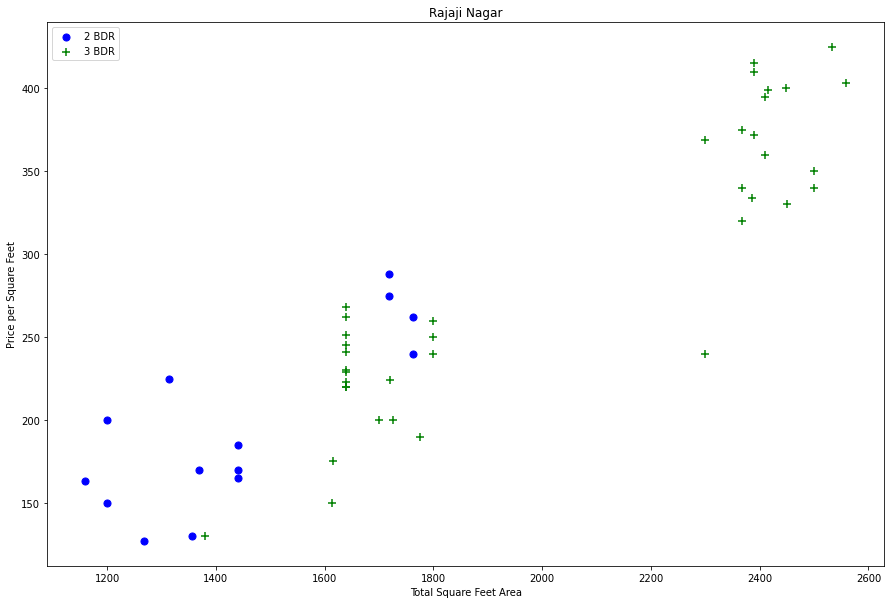

In [41]:
#create a scatter plot to compare 2bdr & 3bdr process for "Rajaji Nagar" location
def scatter_plot(df,location):
    bdr2 = df[(df.location==location) & (df.bedrm==2)]
    bdr3 = df[(df.location==location) & (df.bedrm==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bdr2.total_sqft, bdr2.price, color='blue', label = '2 BDR', s=50)
    plt.scatter(bdr3.total_sqft, bdr3.price, color='green', marker = '+', label = '3 BDR', s=50 )
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()
    
scatter_plot(df5, "Rajaji Nagar")

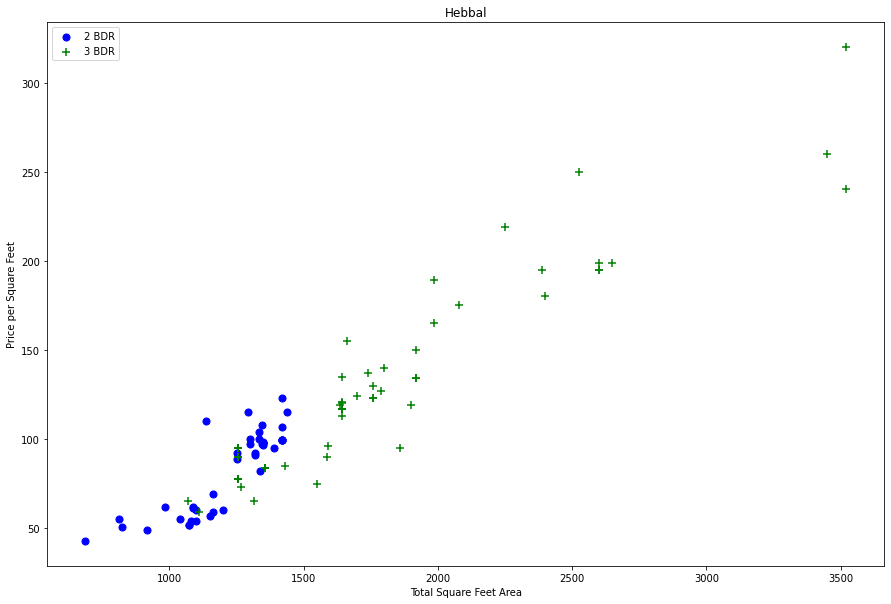

In [42]:
#create a scatter plot to compare 2bdr & 3bdr process for "Hebbal" location
def scatter_plot(df,location):
    bdr2 = df[(df.location==location) & (df.bedrm==2)]
    bdr3 = df[(df.location==location) & (df.bedrm==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bdr2.total_sqft, bdr2.price, color='blue', label = '2 BDR', s=50)
    plt.scatter(bdr3.total_sqft, bdr3.price, color='green', marker = '+', label = '3 BDR', s=50 )
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()
    
    
scatter_plot(df5, "Hebbal")

In [43]:
#calculate stats for 1 & 2 bdr apartments

one_bedr = df5[(df5.bedrm == 1)]
one_bedr.agg(['mean', 'std','count'])


,location,size,total_sqft,bath,price,bedrm,price_per_sqft
mean,NaN,NaN,710.253340,1.061776,36.527838,1.0,5168.207469
std,NaN,NaN,547.763649,0.240981,26.852257,0.0,2061.964917
count,518.0,518.0,518.000000,518.000000,518.000000,518.0,518.000000


In [44]:
two_bedr = (df5[(df5.bedrm == 2)]).agg(['mean', 'std', 'count'])

In [45]:
two_bedr

,location,size,total_sqft,bath,price,bedrm,price_per_sqft
mean,NaN,NaN,1139.378048,1.984020,58.666918,2.0,5092.072723
std,NaN,NaN,192.802027,0.193906,24.662862,0.0,1680.390481
count,4756.0,4756.0,4756.000000,4756.000000,4756.000000,4756.0,4756.000000


In [46]:
#create a function that will remove apartment outliers whose price_per_sqft is less than mean price_per_sqft of a previous apartment value

def remove_bdr_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bdr_stats = {}
        for bdr, bdr_df in location_df.groupby('bedrm'):
            bdr_stats[bdr] = {
                'mean': np.mean(bdr_df.price_per_sqft),
                'std' : np.std(bdr_df.price_per_sqft),
                'count' : bdr_df.shape[0]
            }
        for bdr, bdr_df in location_df.groupby('bedrm'):
            stats = bdr_stats.get(bdr-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bdr_df[bdr_df.price_per_sqft < (stats['mean'])].index.values)                                       
    return df.drop(exclude_indices, axis='index')    
        


In [47]:
df6 = remove_bdr_outliers(df5)
df6.shape


(7329, 7)

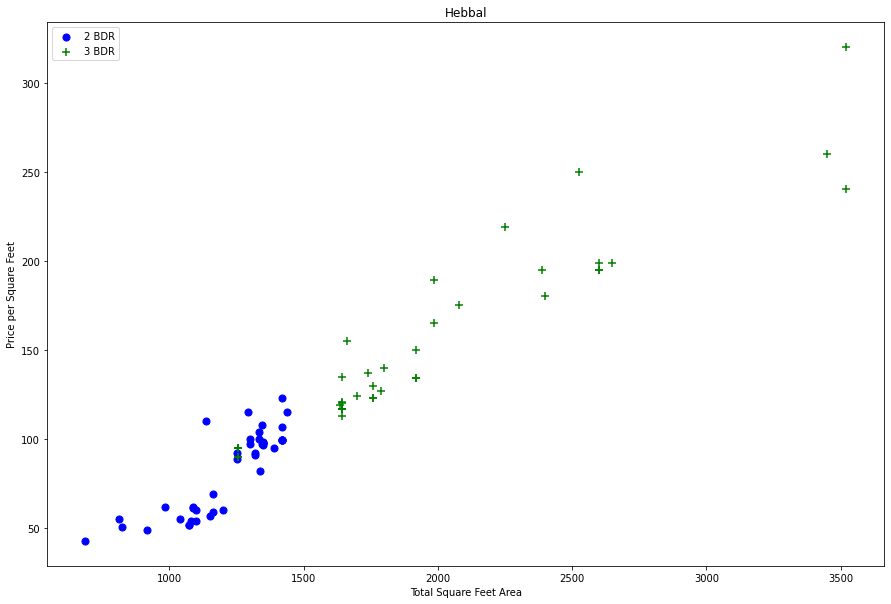

In [48]:
scatter_plot(df6, "Hebbal")

Text(0, 0.5, 'Count')

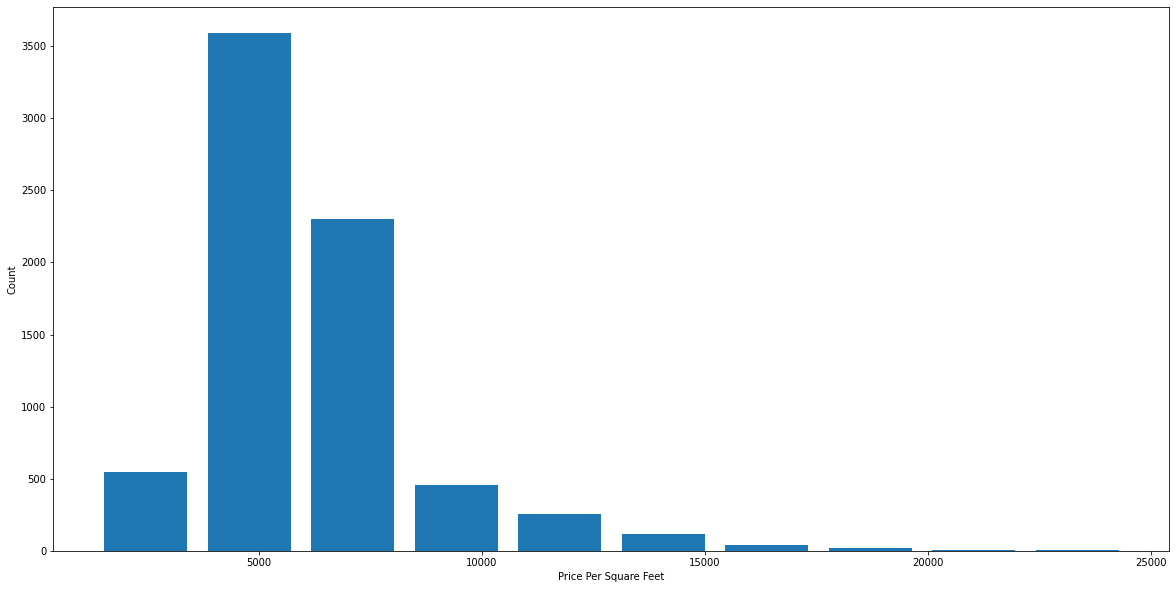

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [50]:
#Exploring "bath" column
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [51]:
df6[df6.bath > 10]

,location,size,total_sqft,bath,price,bedrm,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

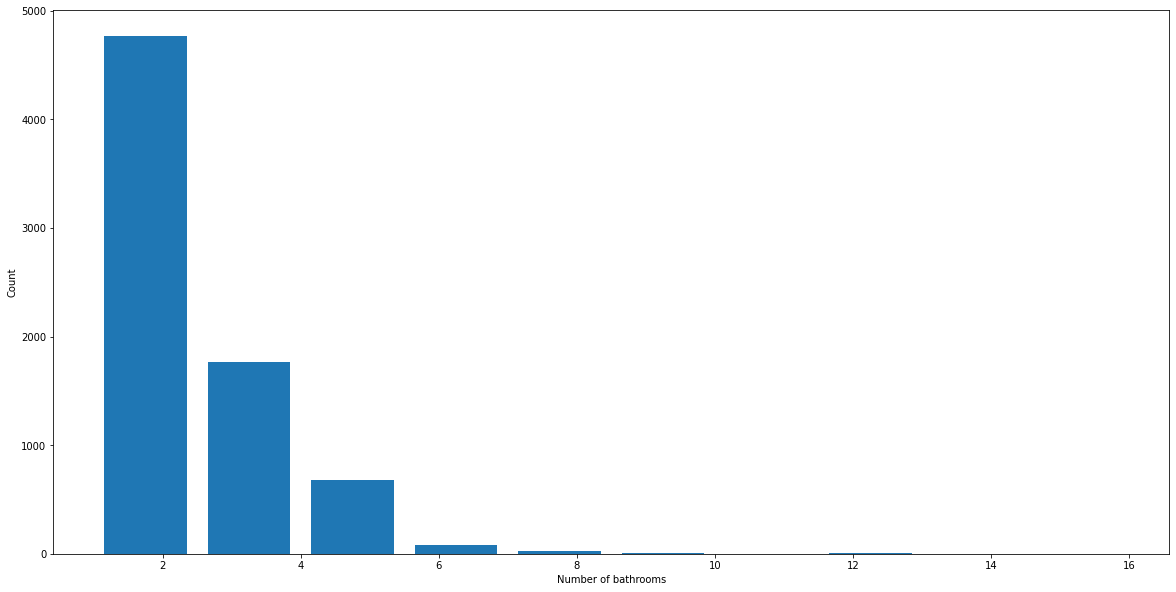

In [52]:
plt.hist(df6.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [53]:
#defining outliers as number of bathrooms exceeding number of bathrooms
df6[df6.bath>df6.bedrm + 2]

,location,size,total_sqft,bath,price,bedrm,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [54]:
#create a new dataframe removing 'bath' ouliers 
df7 = df6[df6.bath<df6.bedrm + 2]
df7.shape

(7251, 7)

In [55]:
#removing columns that won't be used in ML
df8 = df7.drop(['size', 'price_per_sqft'], axis='columns')
df8.head()

,location,total_sqft,bath,price,bedrm
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [56]:
#MODEL BUILDING


#convert string values in 'location' to numeric values
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#concatenating df with dummies df
df9 = pd.concat([df8, dummies.drop('other', axis='columns')], axis='columns')
df9.head()

,location,total_sqft,bath,price,bedrm,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#drop 'location' column'
df10 = df9.drop('location', axis = 'columns')
df10.head(2)

,total_sqft,bath,price,bedrm,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df10.shape

(7251, 245)

In [60]:
#Split df into target set and feature
X = df10.drop('price', axis='columns')
X.head()

,total_sqft,bath,bedrm,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [62]:
#create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [63]:
#import Linear Regression and fit train data into a model and evaluate score of our model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.845227769787429

In [64]:
# use cross validation for model performace
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [65]:
# use Lasso and DecisionTreeRegressor to evaluate model performance
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def model_eval_gridsearchcv(X,y):
    models = {
    'linearregression': {
        'model': LinearRegression(),
        'params': {
            'normalize':[True, False]
        }
    },
     'lasso': {
         'model': Lasso(),
         'params': {
             'alpha': [1,2],
             'selection': ['random', 'cyclic']
         }
     },
     'decision_tree': {
         'model': DecisionTreeRegressor(),
         'params': {
             'criterion': ['mse', 'friedman_mse'],
             'splitter': ['best', 'random']
         }
     }
        
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for model_name, config in models.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model':model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
    })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [66]:
model_eval_gridsearchcv(X,y)




,model,best_score,best_params
0,linearregression,0.818354,{'normalize': True}
1,lasso,0.687434,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.714456,"{'criterion': 'mse', 'splitter': 'best'}"


In [67]:
#function to predict price

def predict_price(location, sqft, bath, bedrm):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedrm
    if loc_index >=0:
        x[loc_index] = 1
    return lin_reg.predict([x])[0]

In [68]:
X.columns

Index(['total_sqft', 'bath', 'bedrm', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [69]:
np.where(X.columns=='Yelahanka')[0][0]

240

In [70]:
 predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.49904677172414

In [71]:
 predict_price('1st Phase JP Nagar', 1000, 3, 3)

86.80519395198999

In [73]:
 predict_price('Yelahanka', 1000, 2, 2)

46.60117267578313

In [74]:
 predict_price('Indira Nagar', 1000, 2, 2)

181.27815484006962

In [75]:
 predict_price('5th Phase JP Nagar', 1000, 2, 3)

40.90046344929017